# Image Processing Fundamentals
Prerequisites: NumPy basics, Matplotlib basics
Topics:
- [Image representation](#image-representation) (pixels, matrices, data types)
- [Color spaces](#color-spaces-rgb-grayscale-hsv-lab) (RGB, Grayscale, HSV, LAB)
- [Basic operations](#basic-operations) (imread/imwrite, imshow) 
- [Image manipulation](#image-manipulation) (cropping, rotating, drawing)
- [Image arithmetic](#image-arithmetic) (blending, thresholding)
- [Histograms](#histograms) (calculation, equalization)


## *"You need to know the basics of [Numpy](./numpy_basics.ipynb) , and [Matplotlib](./matplotlib_basics.ipynb) for this."* 
If you've gone through above resources, `Congratulations  🎉 !!!` you are ready to continue this notebook.

## Image Representation

### Pixels, Matrices, and Data Types
An image in OpenCV is represented as a NumPy array, where each pixel corresponds to an intensity value.

Grayscale images: Each pixel has a single intensity value (0-255 for uint8 format).
Color images: Each pixel has 3 channels (RGB or BGR in OpenCV).
Data Types:

- `uint8` (Unsigned 8-bit integer): 0-255 values (default in OpenCV).
- `float32` (32-bit float): Used for precise computations like image blending.

#### Creating simple image matrix

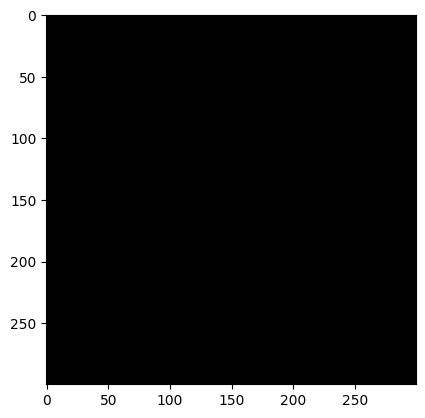

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.zeros((300, 300, 3), dtype=np.uint8)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.axis('off')
plt.show()


In the above code, we created a black image matrix of size 300x300x3 using NumPy's zeros function. The image is displayed using Matplotlib, with a conversion from BGR to RGB color space since OpenCV uses BGR by default.

Understanding Image Data: We created a 3D array filled with zeros, where 300x300 represents the image dimensions, and 3 represents the color channels (Blue, Green, Red).

### Image Display Methods

## *"Understand the different libraries for image input/output from [Exploring different libraries](./exploring_different_libraries_for_io.ipynb) file."* 


Note: Remember to convert between BGR and RGB when switching between OpenCV and other libraries.


### Color Spaces: RGB, Grayscale, HSV, LAB

Different color models are used for various applications:

- **RGB** (Red, Green, Blue): Standard color model used in digital imaging.
- **Grayscale**: A single-channel image with intensity values (0: black, 255: white).
- **HSV** (Hue, Saturation, Value): Useful for color-based segmentation.
- **LAB** (Lab): Perceptually uniform color space, used in color correction.

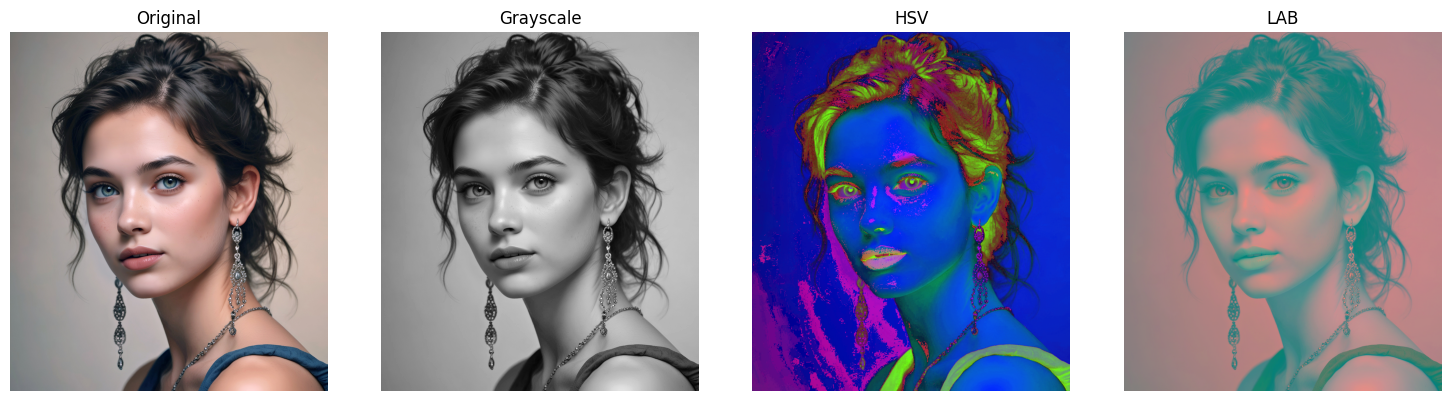

In [3]:
image = cv2.imread("images/girl1.jpg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Convert to LAB
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)


plt.figure(figsize=(15, 4))

plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(143)
plt.imshow(hsv)
plt.title('HSV')
plt.axis('off')

plt.subplot(144)
plt.imshow(lab)
plt.title('LAB')
plt.axis('off')

plt.tight_layout()
plt.show()


## Sampling And Quantization

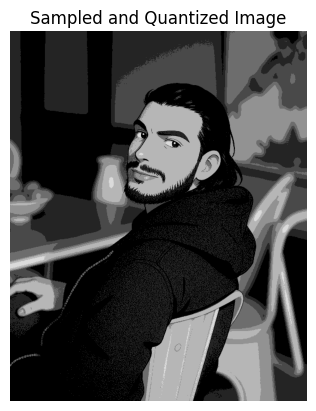

In [3]:
from PIL import Image

def sample_quantize_image(image_path, sampling_factor=2, quantization_levels=8):
    img = Image.open(image_path).convert('L')  
    img_array = np.array(img)

    # Sampling (downsampling)
    sampled_array = img_array[::sampling_factor, ::sampling_factor]

    # Quantization
    max_intensity = np.max(sampled_array)
    quantized_array = np.floor(sampled_array / max_intensity * (quantization_levels - 1))
    quantized_array = quantized_array.astype(np.uint8) #ensure proper data type

    #Rescale back to original range for display purposes, to see the effect more clearly.
    rescaled_quantized = (quantized_array.astype(float) / (quantization_levels - 1)) * max_intensity
    rescaled_quantized = rescaled_quantized.astype(np.uint8)

    return rescaled_quantized


image_path = "images/myimg.png"  
sampled_quantized_image = sample_quantize_image(image_path, sampling_factor=2, quantization_levels=8) 

if sampled_quantized_image is not None:
    plt.imshow(sampled_quantized_image, cmap='gray')
    plt.title("Sampled and Quantized Image")
    plt.axis('off')
    plt.show()

## Basic Operations

Reading/Writing Images `(imread, imwrite)`

In [5]:
# Read an image
image = cv2.imread("images/girl1.jpg")

# save image to the new name as well
# cv2.imwrite("saved_image.jpg", image)


Displaying Images `(imshow, waitKey)`

In [6]:
cv2.imshow("Displayed Image",image )
cv2.waitKey(0)  # It Waits indefinitely until a key is pressed
cv2.destroyAllWindows() # It Closes all OpenCV windows

Accessing Image Properties `(shape, size, channels)`

In [7]:
print("Shape:", image.shape)  
print("Size:", image.size)  
print("Channels:", image.shape[2])  


Shape: (4255, 3768, 3)
Size: 48098520
Channels: 3


## Image Manipulation

### Resizing an Image

In [8]:
resized = cv2.resize(image, (400, 450))
cv2.imshow("Resized Image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Cropping an Image

In [9]:
# Since the original image is too large, cropping from resized image
cropped = resized[150:220, 30:300]  # Crop [y1:y2, x1:x2]
cv2.imshow("Cropped Image", cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotating an Image

In [10]:
(h, w) = resized.shape[:2]
center = (w // 2, h // 2)
matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(resized, matrix, (w, h))
cv2.imshow("Rotated Image", rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Flipping an Image

In [11]:
flipped = cv2.flip(resized, 1)  # Flip horizontally, 0 for vertically
cv2.imshow("Flipped Image", flipped)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing Shapes/Text `(rectangle, putText)`

In [12]:
# Rectangle on the image
cv2.rectangle(resized, (50, 50), (200, 200), (0, 255, 0), 3)

cv2.putText(resized, "OpenCV", (50, 250), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

cv2.imshow("Drawing Shapes", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Blending Two Images

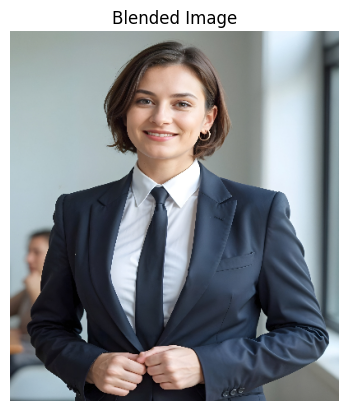

In [27]:
image1 = cv2.imread('./images/girl2.jpg')
image2 = cv2.imread('./images/girl2.jpg')

resized_img1 = cv2.resize(image1, (400, 450))
resized_img2 = cv2.resize(image2, (400, 450))
# Blending images
blended = cv2.addWeighted(resized_img1, 0.5, resized_img2, 0.5, 0)
plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
plt.title('Blended Image')
plt.axis('off')
plt.show()


## Pixel Neighborhood Analysis ( connectivity, distance measure )



### Pixel Connectivity and Neighborhoods

A neighborhood defines a set of pixels that are connected (adjacent) to a given pixel. In digital image processing, there are two main types of pixel connectivity:

#### 4-Connectivity (N4)
- Only pixels sharing an edge are considered neighbors
- Each pixel has 4 neighbors (North, South, East, West)
- Used when strict adjacency is required
- Manhattan distance metric aligns with this connectivity

#### 8-Connectivity (N8) 
- Includes pixels sharing both edges and corners
- Each pixel has 8 neighbors (N4 + diagonal neighbors)
- More commonly used as it better represents visual connectivity
- Chebyshev distance metric aligns with this connectivity

The choice between 4 and 8-connectivity impacts various image processing operations like:
- Region growing
- Connected component labeling  
- Edge detection
- Boundary tracing


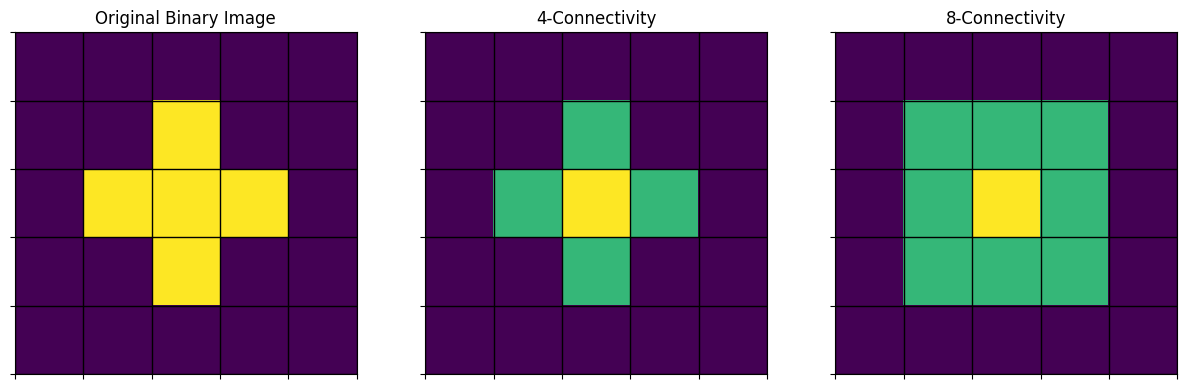

In [32]:
# Create the binary image with the existing pattern
binary_image = np.zeros((5, 5), dtype=np.uint8)
binary_image[1:4, 2] = 1  
binary_image[2, 1:4] = 1  
selected_pixel = (2, 2)

four_connected = np.copy(binary_image)
eight_connected = np.copy(binary_image)

# Mark 4-connectivity and 8-connectivity
neighbors_4 = [(selected_pixel[0]-1, selected_pixel[1]), (selected_pixel[0]+1, selected_pixel[1]), 
              (selected_pixel[0], selected_pixel[1]-1), (selected_pixel[0], selected_pixel[1]+1)]

neighbors_8 = neighbors_4 + [(selected_pixel[0]-1, selected_pixel[1]-1), (selected_pixel[0]-1, selected_pixel[1]+1),
                           (selected_pixel[0]+1, selected_pixel[1]-1), (selected_pixel[0]+1, selected_pixel[1]+1)]

for i, j in neighbors_4:
    if 0 <= i < 5 and 0 <= j < 5:
        four_connected[i,j] = 2

for i, j in neighbors_8:
    if 0 <= i < 5 and 0 <= j < 5:
        eight_connected[i,j] = 2

four_connected[selected_pixel] = 3
eight_connected[selected_pixel] = 3

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

for ax, img, title in [(ax1, binary_image, 'Original Binary Image'),
                       (ax2, four_connected, '4-Connectivity'),
                       (ax3, eight_connected, '8-Connectivity')]:
    ax.imshow(img, cmap='viridis')
    ax.set_title(title)
    # Add grid
    ax.set_xticks(np.arange(-0.5, 5, 1))
    ax.set_yticks(np.arange(-0.5, 5, 1))
    ax.grid(True, color='black', linewidth=1)

    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.show()


### Distance Between Pixels

In digital image processing, pixel distance measures are essential for various operations like edge detection, pattern matching, and region growing. The most common distance metrics are:

1. **Euclidean Distance**: The straight-line distance between two pixels
    - Calculated using Pythagorean theorem: √((x₂-x₁)² + (y₂-y₁)²)
    - Most accurate but computationally expensive

2. **Manhattan Distance (City Block)**: The sum of absolute differences in coordinates
    - Calculated as: |x₂-x₁| + |y₂-y₁|
    - Useful for 4-connected neighborhood operations

3. **Chebyshev Distance**: The maximum of absolute differences in coordinates
    - Calculated as: max(|x₂-x₁|, |y₂-y₁|)
    - Useful for 8-connected neighborhood operations

The visualization above shows these distances between two points in a binary image. The black dots represent the pixels, and the grid shows the pixel coordinates.


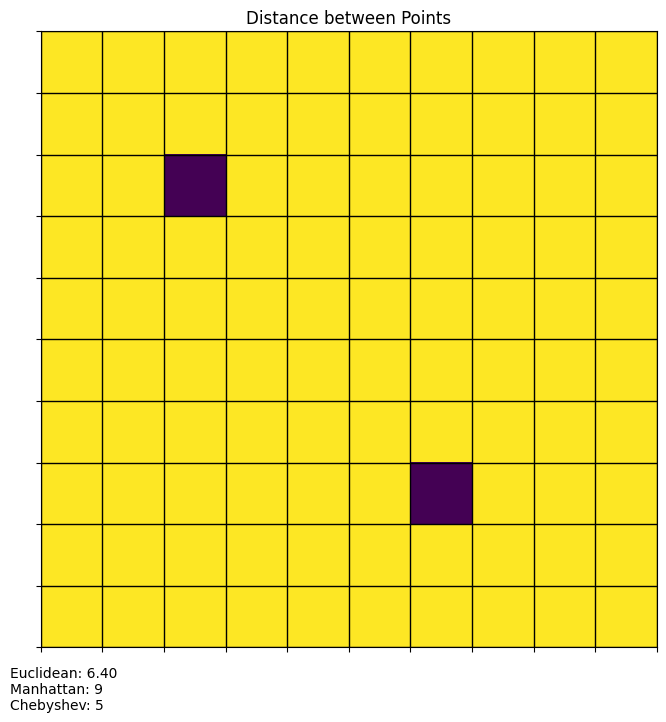

In [45]:
import numpy as np

import matplotlib.pyplot as plt

img = np.ones((10, 10), dtype=np.uint8)

p1 = (2, 2) 
p2 = (7, 6)  

img[p1] = 0
img[p2] = 0
# Calculate distances
euclidean_dist = np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
manhattan_dist = abs(p2[0] - p1[0]) + abs(p2[1] - p1[1])
chebyshev_dist = max(abs(p2[0] - p1[0]), abs(p2[1] - p1[1]))

# Display image with grid
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='viridis')
plt.title('Distance between Points')

# Add grid
plt.grid(True, color='black', linewidth=1)
plt.xticks(np.arange(-0.5, 10.5, 1), [])
plt.yticks(np.arange(-0.5, 10.5, 1), [])

# Add text annotations
plt.text(-1, 10.5, f'Euclidean: {euclidean_dist:.2f}\nManhattan: {manhattan_dist}\nChebyshev: {chebyshev_dist}')
plt.show()


In [46]:
np.arange(-0.5, 10.5, 1)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])